# Setup

In [291]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.pipeline import Pipeline
from sklearn.preprocessing import MinMaxScaler
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.preprocessing import PolynomialFeatures



# Loading and exploring the data

In [292]:
def load_data(filepath): 
    data = pd.read_csv(filepath)
    return data

In [293]:
'''
This function will retrieve the most important features of our dataset, with this we will have a starting point of understanding how our data look like 
'''
def explore_data (data):
    print(data.head().T)
    print(data.describe())
    print(data.info())

# Exploration Data Analysis (EDA)

Based on the information provided by the dataset creator, the samples which have missing values were registered as "-200", so we are going to input again an NaN to the samples that fall into this category

In [294]:
'''
This function will push back Nan values to the dataset, so we could further input values
'''
def input_back(data):
    data = data.applymap(lambda x: np.nan if x == -200 else x)
    return data
    


In [295]:
'''
This function will print the percentage of missing values per category or column that are present in the dataset
'''
def percentage_of_missing_values(data):
    per_miss_val = (data.isna().sum()/len(data))*100
    format_value = per_miss_val.apply(lambda x: f'{x:.2f}%')
    print("Percentage  of missing values")
    print(format_value)


# Add visualizations to the dataset

In [296]:
def plot_histograms(data):
    data.hist(bins=10,figsize=(10,10))
    plt.show()

# Correlation

In [297]:
'''
This function will plot the correlation matrix that will give us more information about the relation between the variables as well as to identify multicolineality
'''
def plot_corr_matrix(data,columns):
    data = data[columns]
    plt.figure(figsize=(10,5))
    sns.heatmap(data.corr(),annot=True, fmt=".2f",cmap= 'RdBu' )
    plt.show()

# Preprocessing and Feature Engineering

In [298]:
'''
This function imputes the mean in the NaN values over the samples
'''
def imputation_mean(data):
    data = data.apply(lambda col: col.fillna(col.mean()))
    return data



In [299]:
'''
This function will transform the independent variables of the model with a min max scaler, to fed the model scaled inputs that works better with machine learning models
'''
def scale_features(data, target):
    scaler = MinMaxScaler()
    features = data.drop(target, axis=1)
    features_scaled = scaler.fit_transform(features)
    data_scaled = pd.DataFrame(features_scaled, columns=features.columns)
    data_scaled[target] = data[target].values
    return data_scaled

# Splitting the dataset

Separate the target variable from the predictors or variables which are going to be trained 

In [300]:
def split_data(data, target, test_size=0.2, random_state=27):
    X = data.drop(target, axis=1)
    y = data[target]
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=test_size, random_state=random_state)
    return X_train, X_test, y_train, y_test

# Training the model

In [301]:
def train_model(X_train, y_train):
    model = LinearRegression()
    model.fit(X_train, y_train)
    return model

# Evaluating the model

In [302]:
def evaluate_model(model, X_text, y_test):
    y_pre = model.predict(X_text)
    rmse = mean_squared_error(y_test, y_pre,squared=False)
    r2 = r2_score(y_test, y_pre)

    print(f'RMSE: {rmse:.4f}')
    print(f'R²: {r2:.4f}')

In [303]:
# Main function for running the pipeline
def main(filepath):
    data = load_data(filepath)
    explore_data(data)
    data = input_back(data)
    data = data.dropna(subset=["CO(GT)"])
    percentage_of_missing_values(data)
    data = data.drop(columns=["Date", "Time", 'NMHC(GT)', 'Unnamed: 15','Unnamed: 16'])
    plot_histograms(data)
    plot_corr_matrix(data, data.columns)
    
    data = imputation_mean(data)
    data_scaled = scale_features(data, 'CO(GT)')
    X_train, X_test, y_train, y_test = split_data(data_scaled, "CO(GT)")
    model = train_model(X_train, y_train)
    evaluate_model(model, X_test, y_test)
    
    lr_model2 = Pipeline([
        ('polynomial',PolynomialFeatures(degree=2,include_bias = False)),
        ('regression',LinearRegression())
    ])
    lr_model2.fit(X_train,y_train)
    evaluate_model(lr_model2, X_train,y_train)

                       0          1          2          3          4
Date           3/10/2004  3/10/2004  3/10/2004  3/10/2004  3/10/2004
Time            18:00:00   19:00:00   20:00:00   21:00:00   22:00:00
CO(GT)               2.6        2.0        2.2        2.2        1.6
PT08.S1(CO)       1360.0     1292.0     1402.0     1376.0     1272.0
NMHC(GT)           150.0      112.0       88.0       80.0       51.0
C6H6(GT)            11.9        9.4        9.0        9.2        6.5
PT08.S2(NMHC)     1046.0      955.0      939.0      948.0      836.0
NOx(GT)            166.0      103.0      131.0      172.0      131.0
PT08.S3(NOx)      1056.0     1174.0     1140.0     1092.0     1205.0
NO2(GT)            113.0       92.0      114.0      122.0      116.0
PT08.S4(NO2)      1692.0     1559.0     1555.0     1584.0     1490.0
PT08.S5(O3)       1268.0      972.0     1074.0     1203.0     1110.0
T                   13.6       13.3       11.9       11.0       11.2
RH                  48.9       47.

/tmp/ipykernel_186097/141291481.py:5: FutureWarning: DataFrame.applymap has been deprecated. Use DataFrame.map instead.
  data = data.applymap(lambda x: np.nan if x == -200 else x)


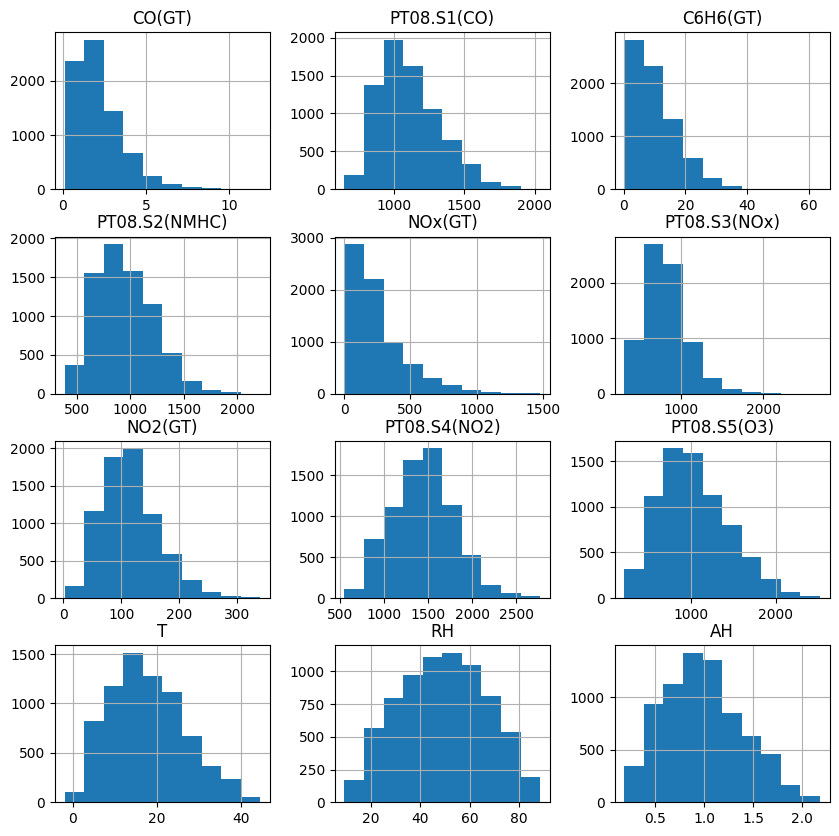

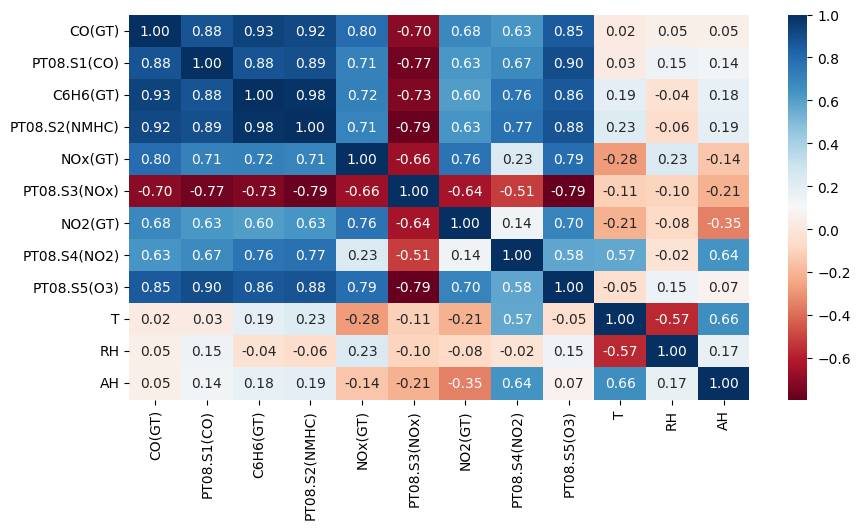

RMSE: 0.4357
R²: 0.8955
RMSE: 0.4445
R²: 0.9095


In [304]:
import os

# Define path relative to notebook and independent of OS
relative_path = os.path.join("..","data","raw","AirQualityUCI.csv")
if (os.path.exists(relative_path)):
    main(relative_path)
else:
    print(f"File not found: {relative_path}")

The variable to be predicted is the one called 'CO(GT)'. To avoid introducing bias into the model, we decided to remove the entries where the value of the dependent variable is unknown. 

Analyzing the data, we observed that the columns 'Unnamed:15' and 'Unnamed:16' contain no values, and the column 'NMHC(GT)' has more than 88 percent missing values, so we decided to eliminate these variables. 

Observing the correlations, the variables C6H6 (GT), PT08.S2(NMHC), and PT08.S1(CO) have the highest correlation with our target variable.